Hello all, im a nebie here and i'll  try to explain you what i've learned so far in an understable way.

Please upvote at the end if you like my kernel and encourage me.

![](https://78.media.tumblr.com/0a56b418334765ec595a0982fe25aac3/tumblr_ouloa3CUT41wq17fxo3_400.gif)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

stage1_solution_filtered.csv
stage2_sample_submission.csv
stage2_test_text.csv
stage2_test_variants.csv
submissionFile
test_text
test_variants
training_text
training_variants



In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999

In [3]:
train_variants_df = pd.read_csv("../input/training_variants")
test_variants_df = pd.read_csv("../input/test_variants")
train_text_df = pd.read_csv("../input/training_text", sep="\|\|", engine='python', header=None, skiprows=1, names=["ID","Text"])
test_text_df = pd.read_csv("../input/test_text", sep="\|\|", engine='python', header=None, skiprows=1, names=["ID","Text"])


In [4]:
train_text_df.shape,test_text_df.shape

((3321, 2), (5668, 2))

In [5]:
train_variants_df.shape,test_variants_df.shape

((3321, 4), (5668, 3))

In [6]:
train_variants_df.head(3)

,ID,Gene,Variation,Class
0,0,FAM58A,Truncating Mutations,1
1,1,CBL,W802*,2
2,2,CBL,Q249E,2


In [7]:
train_text_df.head(3)

,ID,Text
0,0,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,Abstract Background Non-small cell lung canc...
2,2,Abstract Background Non-small cell lung canc...


In [8]:
test_variants_df.head(3)

,ID,Gene,Variation
0,0,ACSL4,R570S
1,1,NAGLU,P521L
2,2,PAH,L333F


In [9]:
test_text_df.head(3)

,ID,Text
0,0,2. This mutation resulted in a myeloproliferat...
1,1,Abstract The Large Tumor Suppressor 1 (LATS1)...
2,2,Vascular endothelial growth factor receptor (V...


In [10]:
train_text_df.Text[0]

"Cyclin-dependent kinases (CDKs) regulate a variety of fundamental cellular processes. CDK10 stands out as one of the last orphan CDKs for which no activating cyclin has been identified and no kinase activity revealed. Previous work has shown that CDK10 silencing increases ETS2 (v-ets erythroblastosis virus E26 oncogene homolog 2)-driven activation of the MAPK pathway, which confers tamoxifen resistance to breast cancer cells. The precise mechanisms by which CDK10 modulates ETS2 activity, and more generally the functions of CDK10, remain elusive. Here we demonstrate that CDK10 is a cyclin-dependent kinase by identifying cyclin M as an activating cyclin. Cyclin M, an orphan cyclin, is the product of FAM58A, whose mutations cause STAR syndrome, a human developmental anomaly whose features include toe syndactyly, telecanthus, and anogenital and renal malformations. We show that STAR syndrome-associated cyclin M mutants are unable to interact with CDK10. Cyclin M silencing phenocopies CDK1

In [11]:
train_variants_df.Class.unique()

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

264


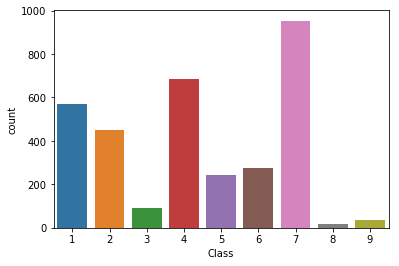

In [12]:
sns.countplot(train_variants_df.Class,data = train_variants_df)
print(len(train_variants_df.Gene.unique()))

In [13]:
train_df = pd.merge(train_text_df,train_variants_df,on = 'ID')
print(train_df.shape)
train_df.head(3)


(3321, 5)


,ID,Text,Gene,Variation,Class
0,0,Cyclin-dependent kinases (CDKs) regulate a var...,FAM58A,Truncating Mutations,1
1,1,Abstract Background Non-small cell lung canc...,CBL,W802*,2
2,2,Abstract Background Non-small cell lung canc...,CBL,Q249E,2


In [14]:
test_df = pd.merge(test_text_df,test_variants_df,on = 'ID')
print(test_df.shape)
test_df.head(3)


(5668, 4)


,ID,Text,Gene,Variation
0,0,2. This mutation resulted in a myeloproliferat...,ACSL4,R570S
1,1,Abstract The Large Tumor Suppressor 1 (LATS1)...,NAGLU,P521L
2,2,Vascular endothelial growth factor receptor (V...,PAH,L333F


This is multi class classification problem and number of classes are total 9. we have to predicat the classes probabalitie  for particular Id. Now we'll see how the submission file should be.

In [15]:
submission_file = pd.read_csv("../input/submissionFile")
submission_file.head()

,ID,class1,class2,class3,class4,class5,class6,class7,class8,class9
0,0,0,0,0,0,0,1,0,0,0
1,1,0,1,0,0,0,0,0,0,0
2,2,0,0,0,0,0,1,0,0,0
3,3,0,0,0,0,0,0,0,1,0
4,4,0,0,0,1,0,0,0,0,0


In [16]:
from sklearn.model_selection import train_test_split

train ,test = train_test_split(train_df,test_size=0.2) 
np.random.seed(0)
train.head()

,ID,Text,Gene,Variation,Class
1305,1305,Mismatch-repair factors have a prominent role ...,MLH1,P654L,6
2201,2201,The PTEN (phosphatase and tensin homolog) phos...,PTEN,D92A,4
1640,1640,Internal tandem duplications of the FMS-like t...,FLT3,FLT3 internal tandem duplications,7
508,508,Tumor suppressor p53-dependent apoptosis is th...,TP53,S215C,1
1802,1802,Intrahepatic cholangiocarcinoma (iCCA) is a fa...,ARAF,N217I,7


In [17]:
X_train = train['Text'].values
X_test = test['Text'].values
y_train = train['Class'].values
y_test = test['Class'].values

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
import xgboost as xgb
import lightgbm as lgb

In [19]:
svc = svm.LinearSVC()
rfc = RandomForestClassifier()
etrc = ExtraTreesClassifier()
xgbc = xgb.XGBClassifier()
lgbc = lgb.LGBMClassifier()
clf = [svc,rfc]
# ,etrc,xgbc,lgbc

In [20]:

for i in clf:
        text_clf = Pipeline([('vect', TfidfVectorizer(lowercase=True,stop_words='english',encoding='utf-8')),
                             ('tfidf', TfidfTransformer()),
                             ('clf', i)
        ])
        text_clf = text_clf.fit(X_train,y_train)
        y_test_predicted = text_clf.predict(X_test)
        acc = np.mean(y_test_predicted == y_test)
        print('accuracy of :',i,'is:',acc )

accuracy of : LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0) is: 0.621052631579
accuracy of : RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False) is: 0.584962406015


Further we'll apply some NLP concepts here and get the most out of the huge text data we have. To be honest to solve this problem one should have domain knowledge in this particulat field. Even though we dont have that biology realted knowledge we'll try to implement some NLP techniques like wordembendings to get the important information.

More to come soon so  watch this space.

**Please encourage me by upvoting**

Thank you.

![](https://media.giphy.com/media/cyoN6pC6kek2A/giphy.gif)